<a href="https://colab.research.google.com/github/AndresMtzLpz/Mineria-de-Datos/blob/master/Practica03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 03: Selección de características**

<ul type="none">
<li>Nombre:      <b>Martínez López Andrés</b></li>
<li>No. Cuenta:  <b>314138567</b></li>
<li>Email:       <b>andres.mtz.cu@gmail.com</b></li>
</ul>

## **Importación de bibliotecas y datos**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Obtenemos los datos de una lista dentro de un repositorio de Github

In [4]:
url = 'https://raw.githubusercontent.com/AndresMtzLpz/Mineria-de-Datos/master/Practicas/Practica03/melb_data.csv'
DatosMelbourne = pd.read_csv(url)

In [6]:
DatosMelbourne

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


Tipo:

* br - dormitorio(s)
* h - casa, cabaña, villa, semi, terraza
* u - unidad, dúplex
* t - casa adosada
* dev site - sitio de desarrollo
* res - otro residencial


Método:

* S - propiedad vendida 
* SP - propiedad vendida antes
* PI - propiedad transferida 
* PN - vendido antes no revelado 
* SN - vendido no revelado
* NB - sin oferta
* VB - oferta del proveedor
* W - retirado antes de la subasta
* SA - vendido después de subasta
* SS - vendido después del precio de subasta no revelado
* N/A - precio o oferta más alta no disponible

## **1.- Tipos de datos**

In [ ]:
DatosMelbourne.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## **2.- Identificación de datos faltantes sección**

In [ ]:
DatosMelbourne.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

La variable BuildingArea y YearBuilt tienen un cantidad importante de datos nulos los cuales podrian generar variaciones en los modelos de predicción.

## **3.- Evaluación Visual**

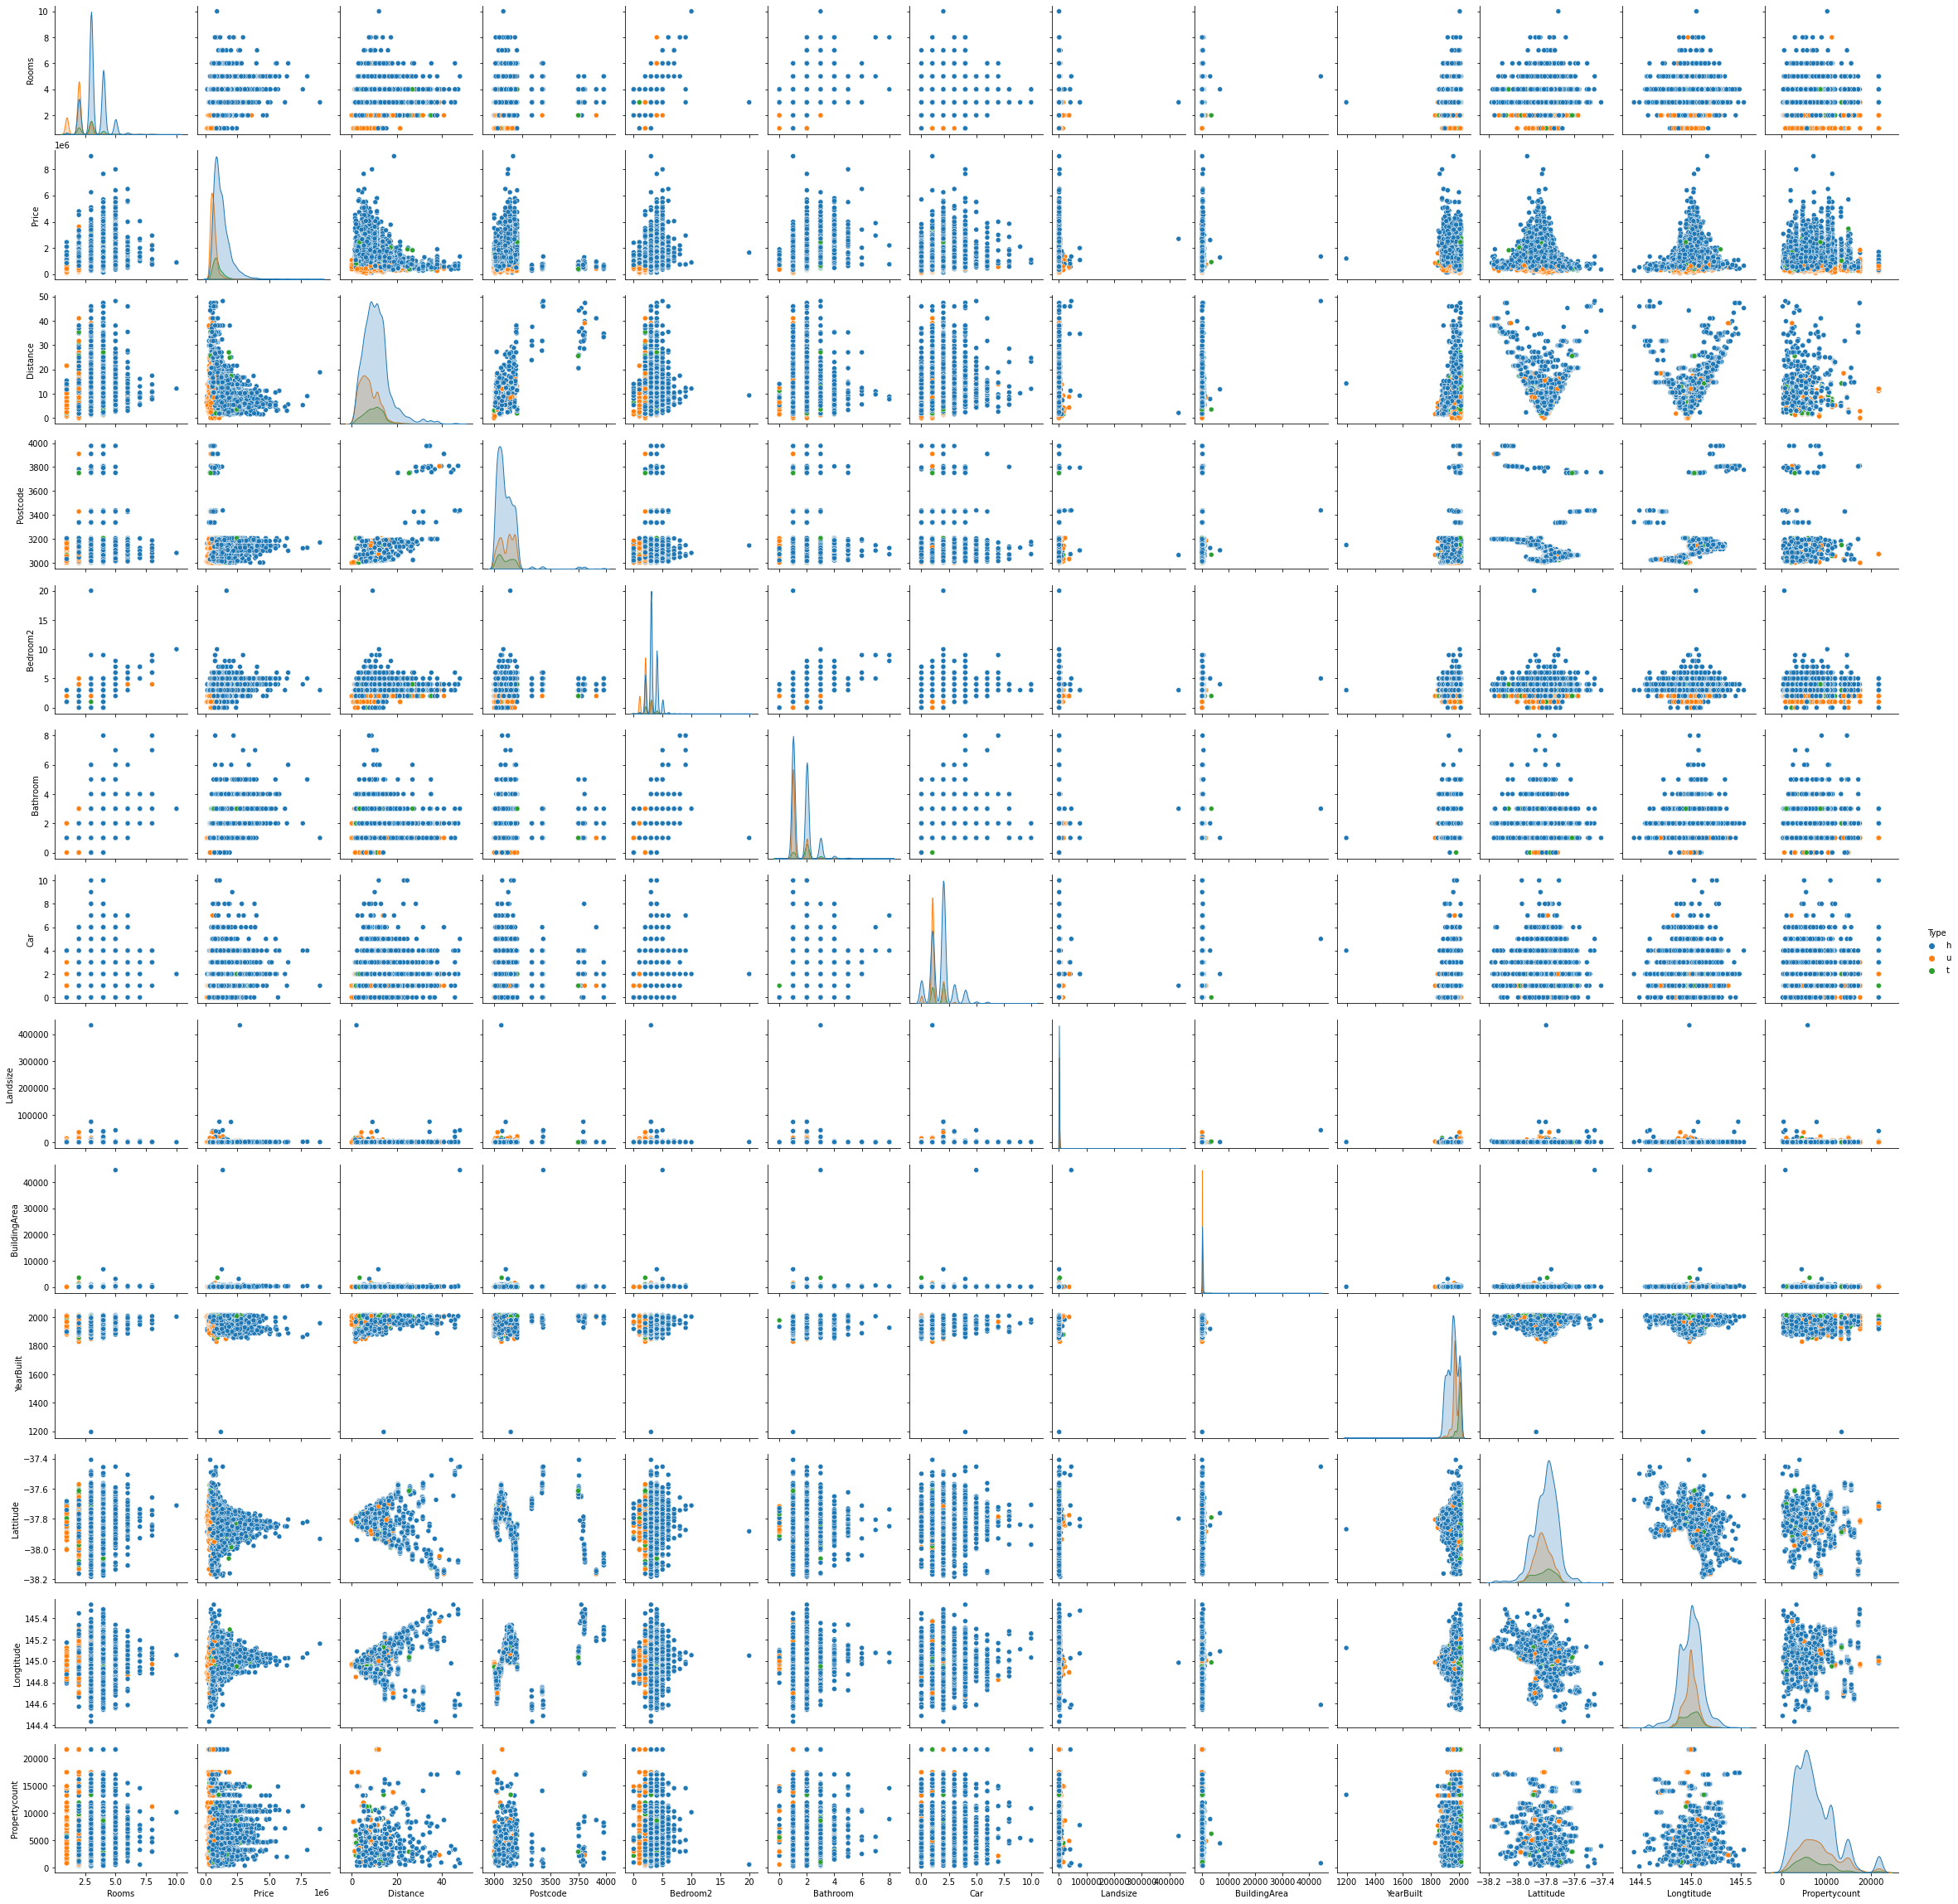

In [ ]:
sns.pairplot(DatosMelbourne, hue='Type')
plt.show()

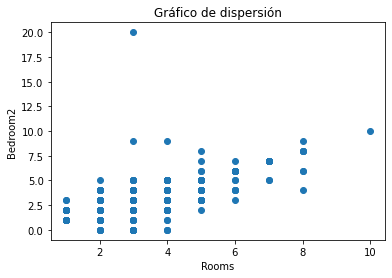

In [ ]:
plt.plot(DatosMelbourne['Rooms'], DatosMelbourne['Bedroom2'],'o')
plt.title('Gráfico de dispersión')
plt.xlabel('Rooms')
plt.ylabel('Bedroom2')
plt.show()

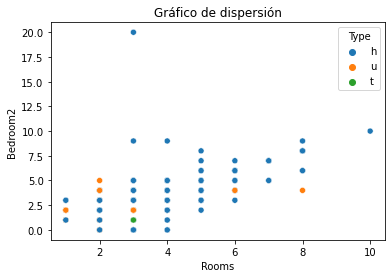

In [ ]:
sns.scatterplot(x='Rooms', y='Bedroom2', data=DatosMelbourne, hue='Type')
plt.title('Gráfico de dispersión')
plt.xlabel('Rooms')
plt.ylabel('Bedroom2')
plt.show()

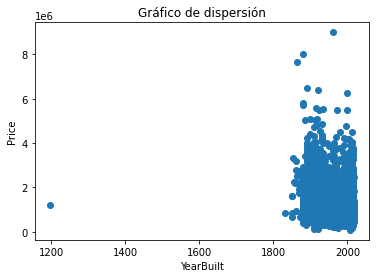

In [ ]:
plt.plot(DatosMelbourne['YearBuilt'], DatosMelbourne['Price'], 'o')
plt.title('Gráfico de dispersión')
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.show()

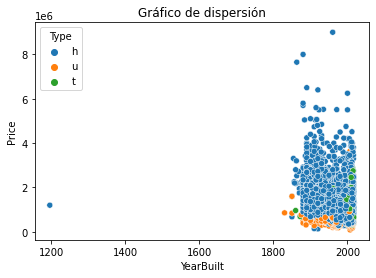

In [ ]:
sns.scatterplot(x='YearBuilt', y='Price', data=DatosMelbourne, hue='Type')
plt.title('Gráfico de dispersión')
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.show()

## **4.- Identificación de relaciones entre variables**

La forma más comun para encontrar relaciones entre variables y reducir dimensionalidad es el uso de correlaciones.

In [ ]:
DatosMelbourne.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


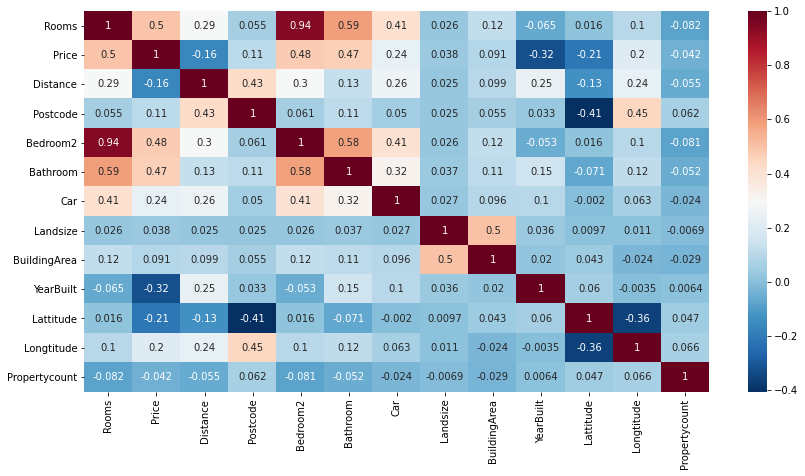

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True)
plt.show()

Las variables Rooms y Bedroom2 poseen una alta correlación, por lo que se podría eliminar a cualquiera de estas dos variables.

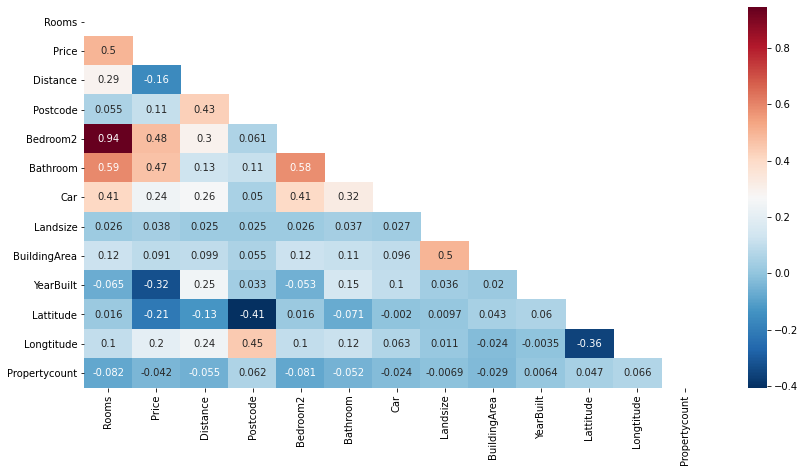

In [ ]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosMelbourne.corr())
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

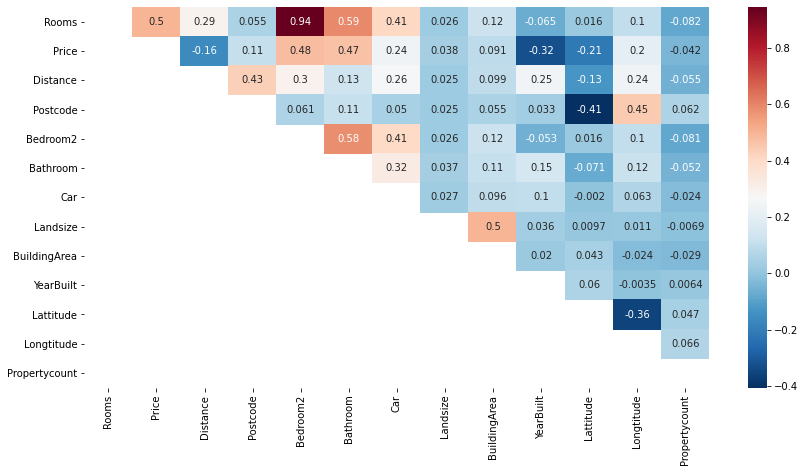

In [ ]:
plt.figure(figsize=(14,7))
MatrizSup = np.tril(DatosMelbourne.corr())
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True, mask=MatrizSup)
plt.show()

In [ ]:
Correlaciones = DatosMelbourne.corr(method='pearson')
Correlaciones

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


Se pueden ordenar las correlaciones obtenidas con respecto a una variable fija (en este caso Rooms).

In [ ]:
print(Correlaciones['Rooms'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores

Rooms           1.000000
Bedroom2        0.944190
Bathroom        0.592934
Price           0.496634
Car             0.408483
Distance        0.294203
BuildingArea    0.124127
Longtitude      0.100771
Postcode        0.055303
Landsize        0.025678
Name: Rooms, dtype: float64 



## **5.- Elección de Variables**

Se realiza una eliminación de variables de acuerdo a los criterios establecidos.

In [ ]:
DatosMelbourne.drop(['Bedroom2', 'Postcode', 'Lattitude', 'Longtitude'], axis=1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,2.0,2.0,652.0,NaN,1981.0,NaN,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,2.0,2.0,333.0,133.0,1995.0,NaN,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,2.0,4.0,436.0,NaN,1997.0,NaN,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,1.0,5.0,866.0,157.0,1920.0,NaN,Western Metropolitan,6380.0
